<a href="https://colab.research.google.com/github/pratikwatwani/Applied-Data-Science/blob/master/Session%2008%20and%20Session%2009/PCA%2C%20Logistic%20Regression%20and%20Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from numpy.random import seed
from numpy.random import randn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [0]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


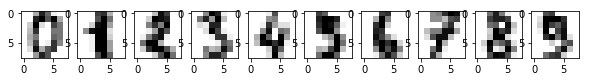

In [5]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [6]:
print("{},{},{}".format(X1.shape[0],X2.shape[0],X3.shape[0]))

1000,497,300


Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [0]:
#X is the original data set with 1797 rows, and 64 features
#X1 is the training set with 1000 rows
#X2 is the validation set with 497 rows
#X3 is the testing set with 300 rows 

In [0]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [0]:
u,s,v = np.linalg.svd(X1)

In [0]:
var_dict = {}
for k in range(0, 64):
  var_dict[k] = (s[k]/s.sum())*100

In [11]:
df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = ['Variance Retained'])
df.index.name = 'Principal Component'
df.head()

,Variance Retained
Principal Component,
0,5.378238
1,4.818316
2,4.458901
3,4.123033
4,3.550910


In [0]:
covar_matrix = PCA(n_components = 64)
covar_matrix.fit_transform(X1)
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=2)*100)

In [13]:
var

array([12., 22., 30., 37., 42., 46., 50., 53., 56., 59., 62., 64., 66.,
       68., 70., 72., 74., 76., 78., 80., 81., 82., 83., 84., 85., 86.,
       87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.])

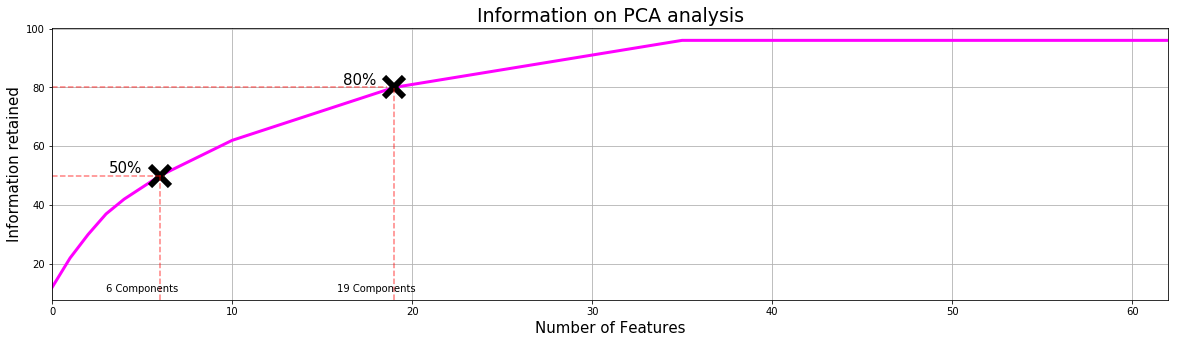

In [47]:
fig, ax = plt.subplots(figsize = (20,5))
ax.grid()
#ax.set_yticks(ticks = np.arange(0,200,10))
ax.set_xlim(xmin=0, xmax = 62)
plt.plot(var, linewidth = 3, color = 'magenta')
plt.plot(np.where(var ==50)[0][0], 50, marker='x', mew = 6,markersize=20, color="k")
plt.plot(np.where(var ==80)[0][0], 80, marker='x', mew = 6, markersize=20, color='k')

plt.text(np.where(var == 50)[0][0]-1, 50+5,'50%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 15)
plt.text(np.where(var == 80)[0][0]-1, 80+5,'80%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 15)


plt.text(np.where(var == 50)[0][0]-1, 50-40,str(np.where(var == 50)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 10)
plt.text(np.where(var == 80)[0][0]-1, 80-70,str(np.where(var == 80)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 10)



ax.axvline(np.where(var == 50)[0][0],color ='red', linestyle ='--', ymin = 0, ymax = 0.46, alpha = 0.5)
ax.axvline(np.where(var == 80)[0][0],color ='red', linestyle ='--', ymin = 0, ymax = 0.78, alpha = 0.5)

ax.axhline(y=50, color = 'red', linestyle = '--', xmin = 0, xmax = 0.1, alpha = 0.5)
ax.axhline(y=80, color = 'red', linestyle = '--', xmin = 0, xmax = 0.3, alpha = 0.5)

plt.xlabel('Number of Features', fontsize = 15)
plt.ylabel('Information retained', fontsize = 15)
plt.title('Information on PCA analysis', fontsize =19)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [15]:
df = pd.DataFrame(data = X1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.310025,0.047254,0.379835,-0.626913,-0.871974,-0.430134,-0.140883,-0.031639,-0.611056,0.511556,0.724934,-0.145684,1.092268,0.735134,-0.148154,-0.031639,0.142260,0.883031,-0.851509,-1.166833,0.503589,1.844178,-0.111896,-0.031639,0.502665,0.449447,-1.487995,-1.644964,0.081853,1.674956,-0.044766,0.0,0.792297,0.028458,-1.457710,-1.755802,0.039601,1.592957,0.0,-0.069656,0.784016,0.583816,-1.141596,-1.076720,0.607494,0.884465,-0.054855,-0.047523,0.628655,1.099605,-1.001633,0.097667,0.522207,-0.771574,-0.200248,-0.031639,-0.291074,0.184702,0.253910,-0.416104,-1.202572,-0.529799,-0.204578
1,0.0,-0.310025,-1.041558,0.151294,0.299103,-0.160159,-0.430134,-0.140883,-0.031639,-0.611056,-1.852548,-0.323037,1.119297,0.088960,-0.543805,-0.148154,-0.031639,-0.728719,-1.196320,1.395672,1.429375,-0.297539,-0.552025,-0.111896,-0.031639,1.500017,0.933418,1.224231,0.956798,-0.922482,-0.593096,-0.044766,0.0,-0.684766,-1.084408,1.094359,0.940247,-0.989003,-0.802467,0.0,-0.069656,-0.567153,-0.933377,1.393524,1.319896,-0.442021,-0.823939,-0.054855,-0.047523,-0.396047,-1.190138,1.239157,1.262683,-0.484943,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-0.197084,0.839113,0.475591,-0.529799,-0.204578
2,0.0,-0.310025,-1.041558,-1.677032,0.762112,1.085519,-0.430134,-0.140883,-0.031639,-0.611056,-1.306986,0.986927,0.908467,0.925050,-0.543805,-0.148154,-0.031639,-0.728719,-0.329924,1.049952,0.131271,1.304717,-0.552025,-0.111896,-0.031639,-0.827137,-1.325111,-0.470910,0.794188,0.584021,-0.593096,-0.044766,0.0,-0.389354,0.028458,0.615846,0.771744,-1.331870,-0.802467,0.0,-0.069656,2.472978,1.342412,1.393524,-0.437622,-1.491535,-0.823939,-0.054855,-0.047523,1.141006,0.923471,1.239157,1.262683,0.354349,0.278472,-0.200248,-0.031639,-0.291074,-1.041198,-2.001060,-0.206902,1.482489,1.557849,-0.204578
3,0.0,-0.310025,0.482780,0.836916,0.299103,-0.871974,-0.430134,-0.140883,-0.031639,2.295274,0.511556,-1.633001,0.908467,-0.747130,-0.543805,-0.148154,-0.031639,-0.148066,-1.542879,1.049952,0.942586,-1.258893,-0.552025,-0.111896,-0.031639,-0.827137,-1.163788,1.054717,0.143747,-1.089871,-0.593096,-0.044766,0.0,-0.684766,-1.243389,-1.298205,0.266235,0.553903,-0.503039,0.0,-0.069656,-0.567153,-1.085096,-1.141596,-1.076720,0.257656,1.128523,-0.054855,-0.047523,-0.396047,0.042801,-1.205341,-0.873179,0.857924,1.118510,-0.200248,-0.031639,-0.291074,0.389019,0.253910,0.211504,0.307775,-0.529799,-0.204578
4,0.0,-0.310025,-1.041558,-2.362655,-0.163905,-1.049928,-0.430134,-0.140883,-0.031639,-0.611056,-1.852548,-1.371009,-0.567344,-1.416003,-0.543805,-0.148154,-0.031639,-0.728719,-1.542879,1.049952,-0.193255,-0.938442,0.047025,-0.111896,-0.031639,-0.827137,-0.357170,1.054717,-1.644964,0.249243,1.674956,-0.044766,0.0,0.792297,1.300304,0.137333,-1.755802,1.239639,0.994101,0.0,-0.069656,0.784016,1.190692,1.393524,0.840573,1.307170,-0.579881,-0.054855,-0.047523,-0.396047,-1.366272,-1.409050,1.068514,0.186491,-0.771574,-0.200248,-0.031639,-0.291074,-1.041198,-2.226557,0.839113,-0.531306,-0.529799,-0.204578


### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

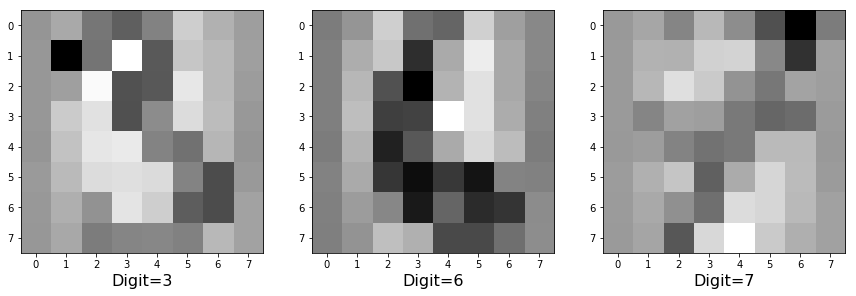

In [16]:
digits = [3,6,7]
count = 1

plt.figure(figsize=(20,15))

for digit in digits:
  plt.subplot(1,4, count)
  plt.xlabel('Digit=%i' %digit, fontsize =16)
  plt.imshow(X1[digit][:].reshape(8,8), cmap=plt.cm.gray_r)
  count+=1

plt.show()

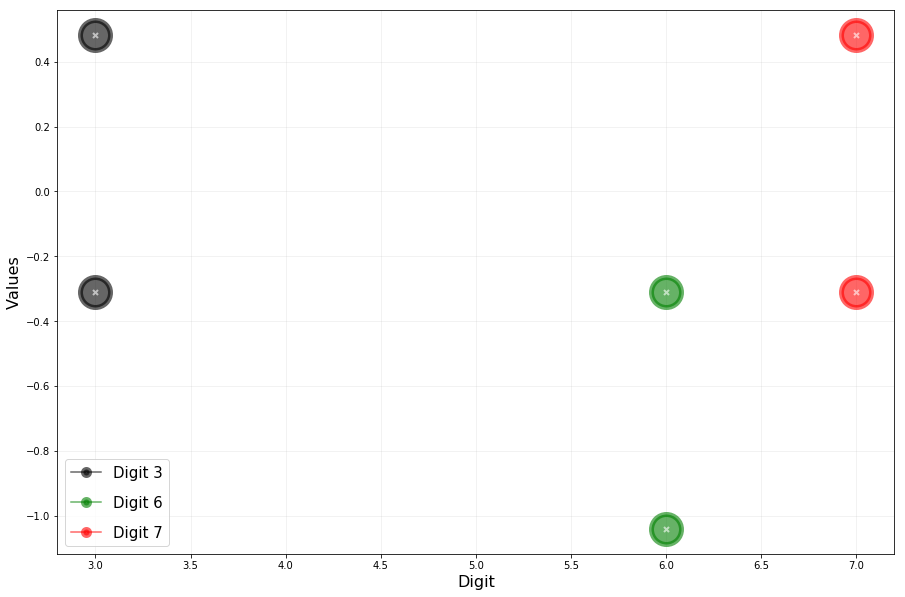

In [17]:
digits = {3 : 'k',6: 'green',7: 'red'}
fig, ax = plt.subplots(figsize = (15,10))
plt.grid(alpha = 0.2)
for digit,color in digits.items():
  ymin, ymax = ax.get_ylim()
  xmin, xmax = ax.get_xlim()

  plt.plot(digit, X1[digit,1], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, label = 'Digit %d' %digit, markeredgecolor = color)
  plt.plot(digit, X1[digit,2], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, markeredgecolor = color)
  plt.plot(digit, X1[digit,1], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)
  plt.plot(digit, X1[digit,2], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)

  plt.xlabel('Digit', fontsize = 16)
  plt.ylabel('Values', fontsize = 16)
  #plt.axhline(y=X1[digit,3], color = 'k', linestyle = ':')
  #plt.text(digit+0.15,X1[digit,1]+0.1,'%f' %X1[digit,1], horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = 10)
  #plt.text(xmin+0.001,X1[digit,3]-0.05,'Value: %f' %X1[digit,3],fontsize = 10)
  
plt.legend(loc = 'best', markerscale = 0.2, fontsize = 15, labelspacing = 1)
plt.show()

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [18]:
print("X(Original) number of records: {},\nX1(Training) number of records: {},\nX2(Validation) number of records: {},\nX3(Test) number of records: {}".format(X.shape[0],X1.shape[0],X2.shape[0],X3.shape[0]))

X(Original) number of records: 1797,
X1(Training) number of records: 1000,
X2(Validation) number of records: 497,
X3(Test) number of records: 300


In [0]:
X3 = scaler.transform(X3)

In [20]:
#Logistic Regression without C
reg = LogisticRegression()
reg.fit(X1[:,:6],y1)
train_labels = reg.predict(X1[:,:6])

print("In Sample Accuracy: {}".format(1.0*(train_labels==y1).sum()/len(train_labels)))

labels = reg.predict(X3[:,:6])
print("Out of  Sample Accuracy: {}".format(1.0*(labels==y3).sum()/len(labels)))

In Sample Accuracy: 0.419
Out of  Sample Accuracy: 0.353333333333


In [21]:
#Logistic Regression with C = 10000
regc = LogisticRegression(C= 10000)
regc.fit(X1[:,:6],y1)
train_labelsc = reg.predict(X1[:,:6])

print("In Sample Accuracy: {}".format(1.0*(train_labelsc==y1).sum()/len(train_labelsc)))

labelsc = regc.predict(X3[:,:6])
print("Out of Sample Accuracy: {}".format(1.0*(labelsc==y3).sum()/len(labelsc)))

In Sample Accuracy: 0.419
Out of Sample Accuracy: 0.353333333333


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [0]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/pratikwatwani/Applied-Data-Science/master/data/portland-oregon-average-monthly-.csv")

In [0]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [0]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [25]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [0]:
df.set_index('month', inplace = True, drop = True)

In [27]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
avgMonthlyRide    114 non-null int32
dtypes: int32(1)
memory usage: 1.3 KB


In [28]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [0]:
#df['ym'] = pd.to_datetime(df['month'], format="%Y-%m").dt.to_period('M')
#df.head()

### Q1. Visualize the time-series of monthly ridership

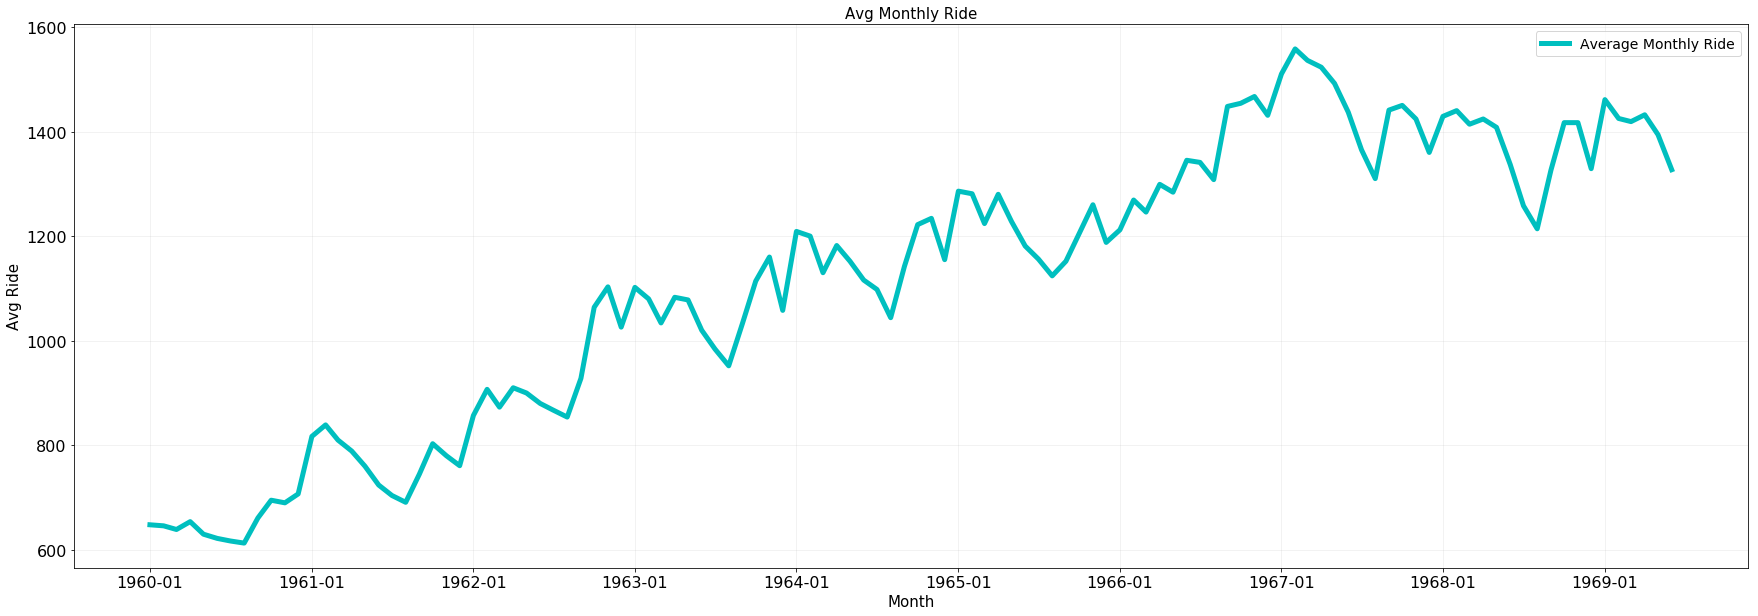

In [30]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df.index,df.avgMonthlyRide, color='c',linewidth=5)
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))
plt.legend(['Average Monthly Ride'], fontsize = 14)
plt.tick_params(labelsize=16)
ax.grid(b=True, alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Avg Ride', fontsize = 15)
plt.title('Avg Monthly Ride', fontsize = 15)
plt.show()
plt.close()

### Q2. Visualize the 12-month moving average to assess the trend

In [0]:
#df.drop('ym', axis = 1, inplace = True)

In [0]:
#df.set_index('month', drop=True, inplace = True)

<Figure size 720x720 with 0 Axes>

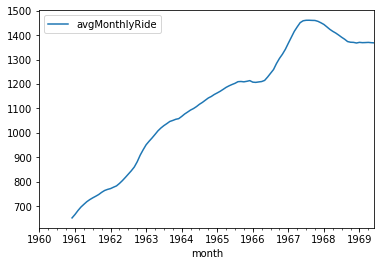

In [33]:
fig= plt.figure(figsize = (10,10))
df.rolling(window = 12).mean().plot()

### Q3. Perform seasonal decomposition using 12 month period

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
avgMonthlyRide    114 non-null int32
dtypes: int32(1)
memory usage: 1.3 KB


<Figure size 1440x720 with 0 Axes>

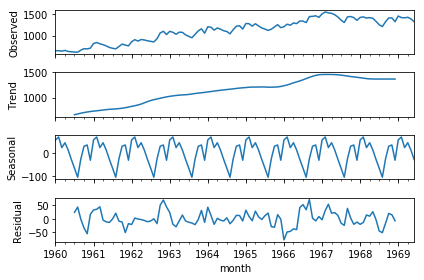

In [35]:
plt.figure(figsize = (20,10))
result = sm.tsa.seasonal_decompose(df)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
observed = result.observed
result.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

The value of sigma is :27.5172766325


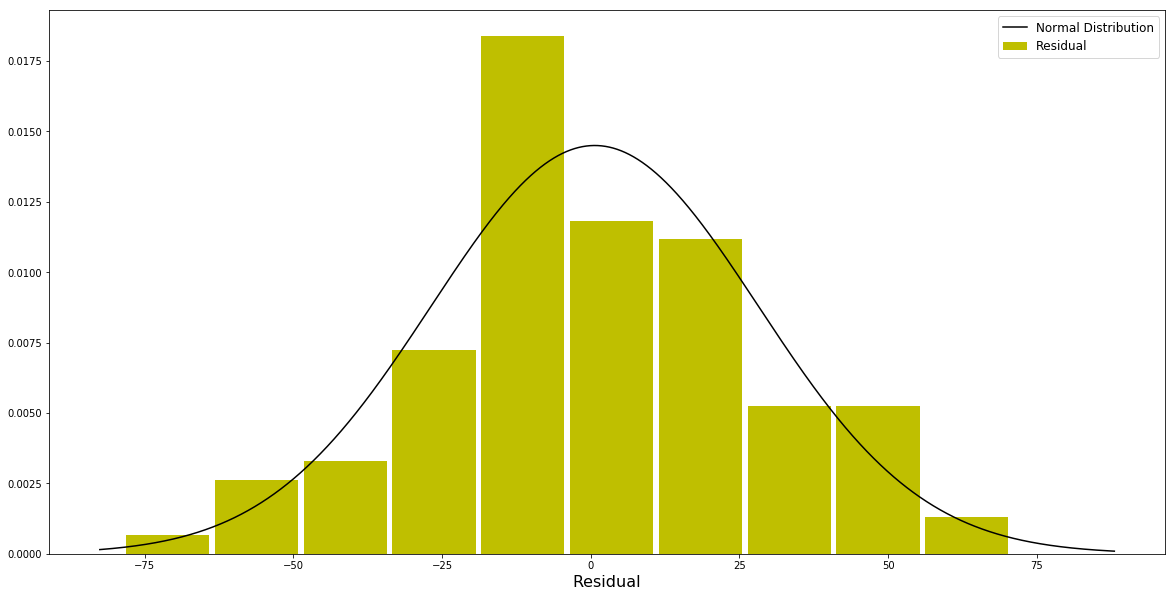

In [36]:
seed(271996)
plt.figure(figsize=(20,10))
residual = np.array(sm.tsa.seasonal_decompose(df, model='additive').resid)
residual = residual[np.logical_not(np.isnan(residual))]

plt.hist(residual,bins=10, density=True, color = 'y', label = 'Residual',zorder = 1, width =14)
sigma=residual.std()
mean = residual.mean()
print('The value of sigma is :{}'.format(sigma)) 

x=np.linspace(-3*sigma,3.2*sigma,5000)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma), color = 'k', label = 'Normal Distribution', zorder = 10)
#plt.axvline(residual.mean(), linestyle = ':', linewidth = 3, ymin = 0, ymax =float(max(scipy.stats.norm.pdf(x,mean,sigma))))
plt.xlabel('Residual', fontsize = 16)
plt.legend(fontsize = 12)

pt11 =mean+ sigma
pt21 =mean-sigma
pt12 =mean+2*sigma
pt22 =mean-2*sigma  
pt13 =mean+3*sigma
pt23 =mean-3*sigma
'''
plt.plot([pt11,pt11],[0.0,scipy.stats.norm.pdf(pt11 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt12,pt12],[0.0,scipy.stats.norm.pdf(pt12 ,mean, sigma)], color='black', alpha = 0.6)


ptx1 = np.linspace(pt1, pt2, 10)
pty1 = scipy.stats.norm.pdf(ptx,mean,sigma)
plt.fill_between(ptx1, pty1, color='#0b559f', alpha='0.1', zorder = 10)

ptx = np.linspace(pt11, pt21, 10)
pty = scipy.stats.norm.pdf(ptx,mean,sigma)
plt.fill_between(ptx, pty, color='#0b559f', alpha='0.4', zorder = 10)

ptx = np.linspace(pt12, pt22, 10)
pty = scipy.stats.norm.pdf(ptx,mean,sigma)
plt.fill_between(ptx, pty, color='#0b559f', alpha='0.2', zorder = 10)
'''

plt.fill()
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

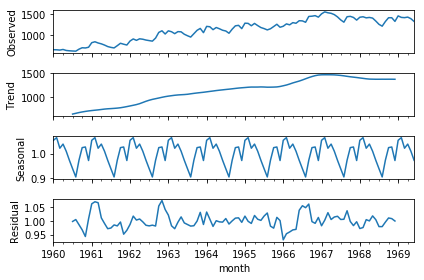

In [37]:
data = df['avgMonthlyRide']
monthly = sm.tsa.seasonal_decompose(data, model='mult', freq = 12)
monthly.plot();

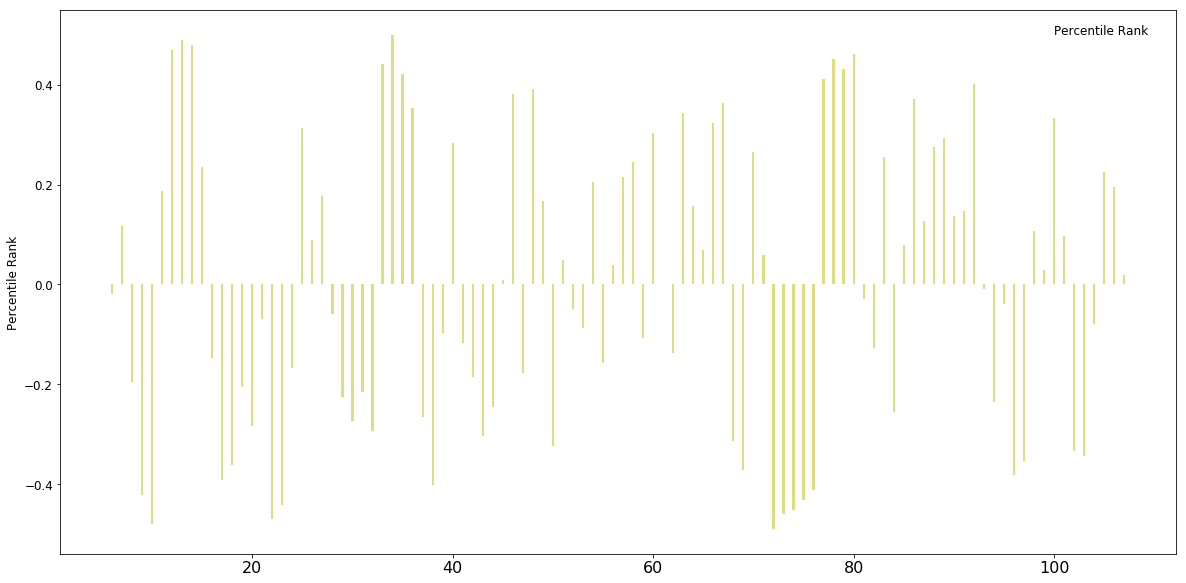

In [38]:
outlier = pd.DataFrame()
outlier['Res'] = monthly.resid
outlier['Percentile_rank'] = outlier.Res.rank(pct = True)-0.5
plt.figure(figsize = (20,10))
plt.bar(np.arange(0, len(outlier)), outlier['Percentile_rank'], color = 'y', label = 'Percentile Rank', width = 0.22, alpha = 0.5)
#plt.bar(np.arange(0, 58), outlier.ix[:58,'Percentile_rank'], color = 'y', label = 'Percentile Rank', width = 0.22, alpha = 0.5)
#plt.bar(np.arange(58, len(outlier)), outlier.ix[58:,'Percentile_rank'], color = 'm', width = 0.22, alpha = 0.5)
plt.yticks(fontsize =12)
plt.xticks(fontsize =16)
plt.ylabel('Percentile Rank', fontsize  = 12)
plt.text(100,0.5,'Percentile Rank', fontsize = 12)
plt.show()

In [39]:
outlier

,Res,Percentile_rank
month,,
1960-01-01,NaN,NaN
1960-02-01,NaN,NaN
1960-03-01,NaN,NaN
1960-04-01,NaN,NaN
1960-05-01,NaN,NaN
1960-06-01,NaN,NaN
1960-07-01,0.997459,-0.019608
1960-08-01,1.004407,0.117647
1960-09-01,0.985716,-0.196078


In [40]:
outlier.dropna(axis = 0, how ='all', inplace = True)
outlier.head()

,Res,Percentile_rank
month,,
1960-07-01,0.997459,-0.019608
1960-08-01,1.004407,0.117647
1960-09-01,0.985716,-0.196078
1960-10-01,0.967008,-0.421569
1960-11-01,0.942772,-0.480392


In [41]:
outlier.Percentile_rank.sort_values(ascending = True)

month
1966-01-01   -0.490196
1960-11-01   -0.480392
1961-11-01   -0.470588
1966-02-01   -0.460784
1966-03-01   -0.450980
1961-12-01   -0.441176
1966-04-01   -0.431373
1960-10-01   -0.421569
1966-05-01   -0.411765
1963-03-01   -0.401961
1961-06-01   -0.392157
1968-01-01   -0.382353
1965-10-01   -0.372549
1961-07-01   -0.362745
1968-02-01   -0.352941
1968-08-01   -0.343137
1968-07-01   -0.333333
1964-03-01   -0.323529
1965-09-01   -0.313725
1963-08-01   -0.303922
1962-09-01   -0.294118
1961-09-01   -0.284314
1962-07-01   -0.274510
1963-02-01   -0.264706
1967-01-01   -0.254902
1963-09-01   -0.245098
1967-11-01   -0.235294
1962-06-01   -0.225490
1962-08-01   -0.215686
1961-08-01   -0.205882
                ...   
1964-10-01    0.215686
1968-10-01    0.225490
1961-04-01    0.235294
1964-11-01    0.245098
1966-12-01    0.254902
1965-11-01    0.264706
1967-05-01    0.274510
1963-05-01    0.284314
1967-06-01    0.294118
1965-01-01    0.303922
1962-02-01    0.313725
1965-07-01    0.323529
1968-